In [7]:
%matplotlib notebook

# Dependencies
#import json
#import pprint
#import requests
#import sys
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gmaps


#api keys
#from config_api import GEOCODE_API_KEY, YELP_API_KEY
#gmaps.configure(api_key=GEOCODE_API_KEY)

#Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#time manipulations
from datetime import datetime, timedelta



In [12]:
# File to Load 
restaurant_data = pd.read_csv("uci_yelp_businesses.csv")
restaurant_data

,Unnamed: 0,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,1,1,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,631,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
2,2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612
3,3,3,lzx8_1F8TqC9y8L3ElRifg,Hen House Grill,33.649303,-117.832297,0.92,1480,$$,2,747,4.0,Persian/Iranian,Mediterranean,4515 Campus Dr,Irvine,CA,92612
4,4,4,RcWSCtCaDcn9FPZwM0AQrg,Spoleto,33.651059,-117.839014,0.79,1272,$$,2,280,4.0,Italian,Salad,4175 Campus Dr,Irvine,CA,92612
5,5,5,pm1SGfjnSDIDw-1W1XbCSQ,Eureka!,33.650563,-117.839237,0.75,1213,$$,2,800,3.5,American (New),Bars,4143 Campus Dr,Irvine,CA,92612
6,6,6,jTyfj3e8PIkc4KTVh3sAqw,Mendocino Farms,33.650802,-117.839104,0.77,1242,$$,2,479,4.0,Sandwiches,Salad,4187 Campus Dr,Irvine,CA,92612
7,7,7,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839278,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
8,8,8,tKKPXIpijBNRqHz90UX5JA,Temakira,33.650506,-117.838217,0.78,1247,$,1,94,3.5,Sushi Bars,Japanese,4237 Campus Dr,Irvine,CA,92612
9,9,9,I5hqwi5SRlFmdam78sa2HA,Taco Rosa,33.627031,-117.849114,0.97,1562,$$,2,439,3.5,Mexican,Beer Bar,2632 San Miguel Dr,Newport Beach,CA,92660


In [60]:
#TEST1
#Fields to extract - review rating, type
#rating_data = restaurant_data[["name", "review rating"]]
#rating_data
#result = df.sort(['A', 'B'], ascending=[1, 0])
#typrate_sorted = restaurant_data.sort_values(["review rating", "type"],ascending=False)
rating_sorted = restaurant_data.sort_values(["review rating"],ascending=False)
top_rated= rating_sorted.head(10)
top_rated

,Unnamed: 0,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
33,33,35,qxI7VvvxTFuBGmPlv0C6DQ,Café Med,33.646480,-117.848900,0.49,791,$,1,4,4.5,Restaurants,NaN,Bldg 800 Academy Way,Irvine,CA,92697
39,39,41,61nCoxInTSrC8XGN_XWKXA,Bridge Cafe,33.644908,-117.834883,0.62,1000,$,1,2,4.5,Cafes,Coffee & Tea,510 East Peltason Dr,Irvine,CA,92617
7,7,7,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839278,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
41,41,43,UiFrBo6P7ZNtQiccUMsFRQ,Med Ed Cafe,33.642078,-117.851237,0.54,869,$,1,3,4.5,Cafes,NaN,836 Health Sciences Rd,Irvine,CA,92697
17,17,17,esUqa0VrYZoKlAr0RpFtYQ,In-N-Out Burger,33.650154,-117.840630,0.70,1126,$,1,641,4.5,Burgers,Fast Food,4115 Campus Dr,Irvine,CA,92612
16,16,16,saKl29canx_KLrDf1YmBTA,Blaze Fast-Fire'd Pizza,33.649757,-117.839082,0.71,1137,$,1,923,4.0,Pizza,Salad,4255 Campus Dr,Irvine,CA,92612
30,30,31,ILs5B_wcYtYQeQP76-H3pQ,Which Wich,33.649927,-117.831907,0.97,1554,$,1,174,4.0,Sandwiches,NaN,4537 Campus Dr,Irvine,CA,92612
28,28,28,hpAfAAkdyOHEp4sSwjhrjw,Elements Cafe,33.638362,-117.850718,0.36,579,$,1,12,4.0,American (New),American (Traditional),5300 California Ave,Irvine,CA,92614
27,27,27,6EsUSHmcRJDrK_qGUir2sg,Nekter Juice Bar,33.650237,-117.838652,0.75,1202,$,1,212,4.0,Juice Bars & Smoothies,Gluten-Free,4237 Campus Dr,Irvine,CA,92612


In [61]:
#file operations - AA code
#get the dates for output files
title_date = datetime.now().strftime("%m/%d/%y")
file_date = datetime.now().strftime("%m%d%y")
print(title_date)
print(file_date)

09/22/18
092218


<IPython.core.display.Javascript object>


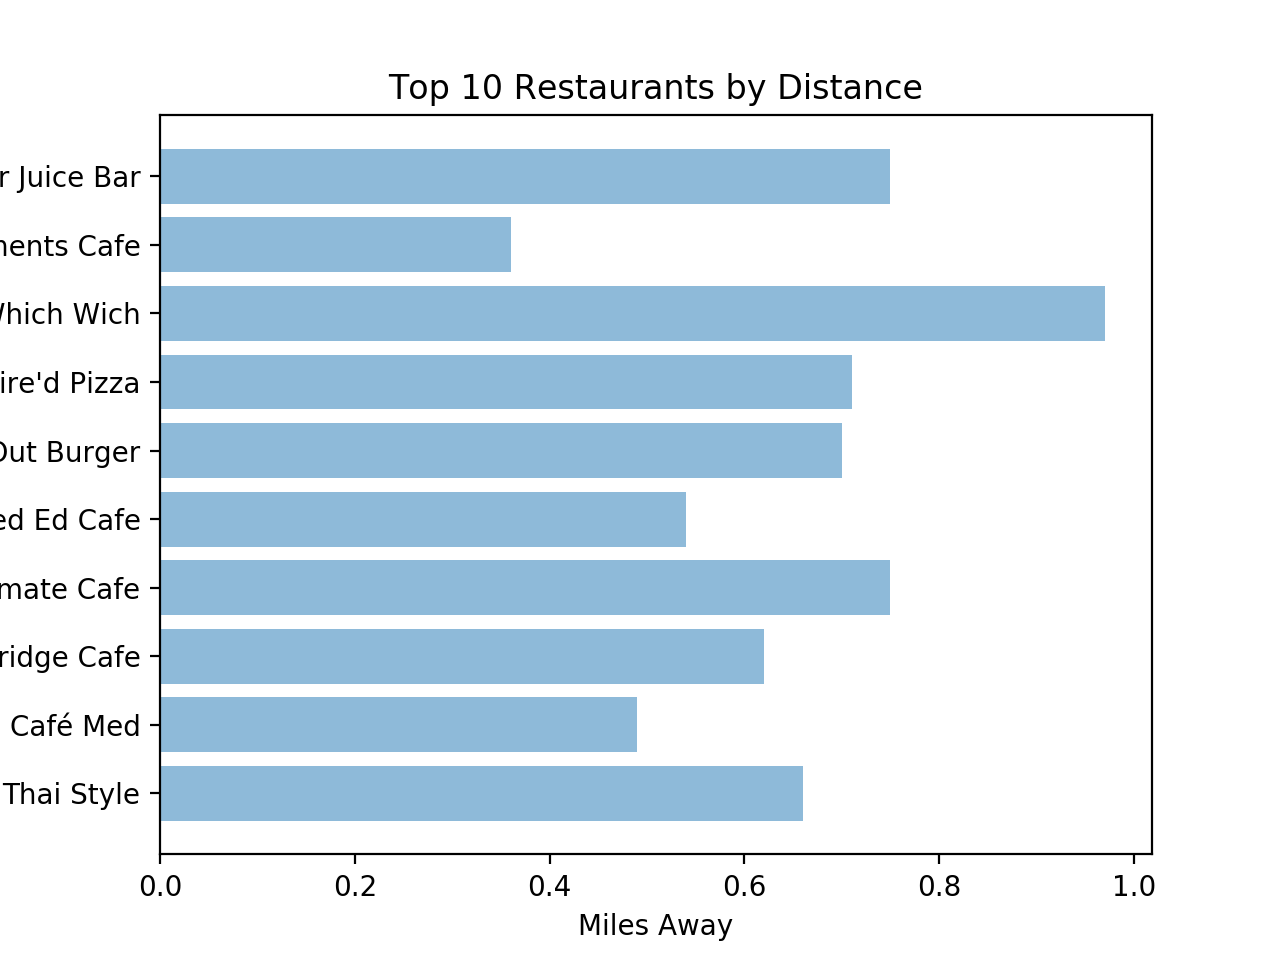

In [67]:
#TEST3 - HORIZONTAL BAR
#Barplot prep
miledist = top_rated["distance miles"].values
name = top_rated["name"].values

y_pos = np.arange(len(name))
 
plt.barh(y_pos, miledist, align='center', alpha=0.5)
plt.yticks(y_pos, name)
plt.xlabel('Miles Away')
plt.title('Top 10 Restaurants by Distance')
 
plt.savefig("Top 10 Restaurants by Distance_SS.png")
plt.show()